Hello, welcome to the neural net training ground for finding christmas trees. The advent of code's first (to my knowledge) puzzle that might need machine learning :tada:

Run on the CMU Machine Learning Class venv, which is hard for vscode to recognize on its own, so we launch juypter as a server and connect it

from : https://help.pythonanywhere.com/pages/IPythonNotebookVirtualenvs
```
"C:\Users\Tim\Documents\School\2023-2024\Spring Semester\Machine Learning\Homework\.venv\Scripts\Activate"
juypter notebook
```

Copy URL from startup log: http://localhost:8888/tree?token=263cd32....
Setlect kernel in VSC, supply this url
Then select "ml-kernel" which points to the right site packages list

In [64]:
import torch
from torch import nn, optim
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
os.chdir(r"C:\Users\Tim\Documents\GitHub\AdventofCode\Day 14")
from PIL import Image
import PIL.ImageOps as ImOp

torch.float32
torch.float32


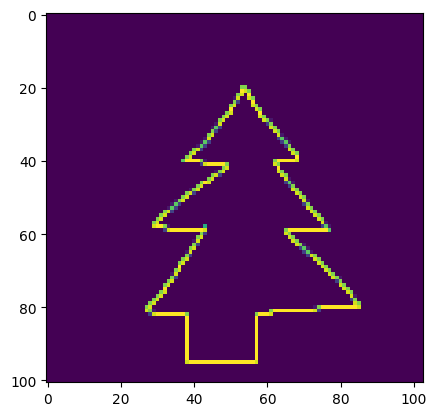

In [ ]:
# load/create dataset
tree_dataset = []
for path in glob.glob(r"data\tree*"):
    image = Image.open(path).convert("L")
    image = ImOp.invert(image)
    image = np.array(image, dtype=np.float32)
    X = torch.tensor(image).reshape(1,1,103,101)
    tree_dataset.append(X)
plt.imshow(image)
shape = image.shape
size = image.size

# create non-tree images
null_dataset = []
for _ in range(20):
    indices = np.random.choice(size, 500, replace=False)
    image = np.full(shape, 0, dtype=np.float32)
    image.ravel()[indices] = 1
    X = torch.tensor(image).reshape(1,1,103,101)
    null_dataset.append(X)

In [107]:
# build the network
    # structure copied from the MNIST numerical recognition example
model = nn.Sequential(
    nn.Conv2d(1, 10, kernel_size=5),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),
    nn.Conv2d(10, 20, kernel_size=5),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),
    nn.Flatten(1),
    nn.Linear(9680, 50),
    nn.Linear(50,1)
)


In [101]:
def get_img(idx):
    if idx < (l:=len(tree_dataset)):
        return tree_dataset[idx], torch.tensor(1.0)
    else:
        return null_dataset[idx-l], torch.tensor(0.0)

In [114]:
epochs = 100
opt = optim.SGD(model.parameters(), lr=0.01)
lossfun = nn.MSELoss()
for _ in range(epochs):
    for sample_i in np.random.permutation(len(tree_dataset) + len(null_dataset)):
        X, Y = get_img(sample_i)

        pred = model(X)
        loss = lossfun(pred, Y)
        opt.zero_grad()
        loss.backward()
        opt.step()
        

C:\Users\Tim\Documents\School\2023-2024\Spring Semester\Machine Learning\Homework\.venv\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [115]:
X, Y = get_img(0)
print(model(X).item())

nan
